## BoE Assignment

## Task I
#### Using the data provided, please analyse this data using R or Python and produce a short report, including tables and charts, to highlight which firms should receive the most attention, according to the metrics above.

#### Terms Simplified:
#### Terms  |               Abbreviation               |                                          Meaning 
1. GWP    | Gross Written Premium   | Total turnover of the company
2. NWP    | Net Written Premium     | Total premium on insurance underwritten by an insurer during a specified                                           period after the deduction of premium applicable to reinsurance.
3. SCR    | Solvent Capital Ratio   |EOF / SCR
4. EOF_SCR| Eligible Own Fund SCR   |The SCR ratio is calculated using Eligible Own Funds most of the times.
5. EOAOL  | Assests Over Liabilities| If a firm have more assets than liabilities then they are solvent.
6. NWP/GWP| NWP/GWP ratio           | Insuring the insurers

#### Things to Remember:
1. When companies report solvency this is often done as a percentage using a SCR  ratio. The lowest acceptable ratio is 100%. As any ratio it can be high for two reasons, because of the nominator or the denominator. 

In [1]:
#importing libraries and packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting headers
headers=['Firm_Name',
         'NWP_2016','NWP_2017','NWP_2018','NWP_2019','NWP_2020',
         'SCR_2016','SCR_2017','SCR_2018','SCR_2019','SCR_2020',
         'EOF_SCR_2016','EOF_SCR_2017','EOF_SCR_2018','EOF_SCR_2019','EOF_SCR_2020'
        ,'SCR_Coverage_2016','SCR_Coverage_2017','SCR_Coverage_2018','SCR_Coverage_2019','SCR_Coverage_2020',
         'GWP_2016','GWP_2017','GWP_2018','GWP_2019','GWP_2020',
         'Total_asset_2016','Total_asset_2017','Total_asset_2018','Total_asset_2019','Total_asset_2020',
         'Total_liabilities_2016','Total_liabilities_2017','Total_liabilities_2018','Total_liabilities_2019',
         'Total_liabilities_2020',
         'EOAOL_2016','EOAOL_2017','EOAOL_2018','EOAOL_2019','EOAOL_2020']

In [3]:
#reading file
df=pd.read_excel('/Users/sumakshichauhan/Desktop/Projects/Bank of England/data.xlsx',skiprows=[1])
#setting axis
df1 = df.set_axis(headers, axis=1, inplace=False)
df1.head(5)

,Firm_Name,NWP_2016,NWP_2017,NWP_2018,NWP_2019,NWP_2020,SCR_2016,SCR_2017,SCR_2018,SCR_2019,...,Total_liabilities_2016,Total_liabilities_2017,Total_liabilities_2018,Total_liabilities_2019,Total_liabilities_2020,EOAOL_2016,EOAOL_2017,EOAOL_2018,EOAOL_2019,EOAOL_2020
0,Firm 1,-13779.815629,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,...,69696.557128,0.000000,0.000000,0.000000,0.000000,2031.035937,4.817920,0.000000,0.000000,0.000000
1,Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.146471,...,8.526315,9.585694,8.596011,6.932901,8.526285,33.391180,40.637281,50.621614,57.602326,29.652400
2,Firm 3,0.000000,75.609681,70.578732,78.432782,85.735830,322.955115,3.637823e+02,362.290859,394.295982,...,926.065667,1016.401689,974.733900,1032.497033,1214.913306,583.650604,558.916856,566.073253,598.338699,540.065747
3,Firm 4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.644800,1.633275e+04,17103.616000,17219.246080,...,50485.010600,56618.706223,62935.244436,64005.547967,71237.710999,16919.338528,16415.923037,18249.584833,20795.976010,22827.370034
4,Firm 5,68.200993,51.663132,44.010833,42.008556,81.273653,52.824396,3.805377e+01,34.696815,57.231788,...,193.425808,161.417709,118.910867,107.269800,104.922113,148.433518,150.091268,152.205234,142.479147,130.559790


In [4]:
#Removing Outliers(i.e. elcluding firms with no business in the past 5 years)
df2=df1[(df1['GWP_2016']>0) & (df1['GWP_2017']>0) & (df1['GWP_2018']>0) & (df1['GWP_2019']>0)& (df1['GWP_2020']>0)] 

In [5]:
#Calculating NWP/GWP ratio for each year 
df2['NWP_GWP_2016']=df2['NWP_2016']/df2['GWP_2016']
df2['NWP_GWP_2017']=df2['NWP_2017']/df2['GWP_2017']
df2['NWP_GWP_2018']=df2['NWP_2018']/df2['GWP_2018']
df2['NWP_GWP_2019']=df2['NWP_2019']/df2['GWP_2019']
df2['NWP_GWP_2020']=df2['NWP_2020']/df2['GWP_2020']

In [6]:
#Replacing null values with 0 for each year 
df2['NWP_GWP_2016']=df2['NWP_GWP_2016'].fillna(0)
df2['NWP_GWP_2017']=df2['NWP_GWP_2017'].fillna(0)
df2['NWP_GWP_2018']=df2['NWP_GWP_2018'].fillna(0)
df2['NWP_GWP_2019']=df2['NWP_GWP_2019'].fillna(0)
df2['NWP_GWP_2020']=df2['NWP_GWP_2020'].fillna(0)

In [7]:
#Calculating average for NWP/GWP ratio, GWP ratio, EOAOL, Total Liabilities, EOF_SCR and SCR
df2['NWP_GWP_AVG']=(df2['NWP_GWP_2016']+df2['NWP_GWP_2017']+df2['NWP_GWP_2018']+df2['NWP_GWP_2019']+df2['NWP_GWP_2020'])/5
df2['GWP_AVG']=(df2['GWP_2016']+df2['GWP_2017']+df2['GWP_2018']+df2['GWP_2019']+df2['GWP_2020'])/5
df2['EOAOL_AVG']=(df2['EOAOL_2016']+df2['EOAOL_2017']+df2['EOAOL_2018']+df2['EOAOL_2019']+df2['EOAOL_2020'])/5
df2['Total_liabilities_AVG']=(df2['Total_liabilities_2016']+df2['Total_liabilities_2017']+df2['Total_liabilities_2018']+df2['Total_liabilities_2019']+df2['Total_liabilities_2020'])/5
df2['EOF_SCR_AVG']=(df2['EOF_SCR_2016']+df2['EOF_SCR_2017']+df2['EOF_SCR_2018']+df2['EOF_SCR_2019']+df2['EOF_SCR_2020'])/5
df2['SCR_AVG']=(df2['SCR_2016']+df2['SCR_2017']+df2['SCR_2018']+df2['SCR_2019']+df2['SCR_2020'])/5

In [8]:
#Calculating standard deviation of NWP/GWP ratio for each year
df2['NWP_GWP_2016_AVG']=df2['NWP_2016'].sum()/len(df2['NWP_2016'])
df2['NWP_GWP_2016_SD'] = df2['NWP_GWP_2016']- df2['NWP_GWP_2016_AVG']
df2['NWP_GWP_2017_AVG']=df2['NWP_2017'].sum()/len(df2['NWP_2017'])
df2['NWP_GWP_2017_SD'] = df2['NWP_GWP_2017']- df2['NWP_GWP_2017_AVG']
df2['NWP_GWP_2018_AVG']=df2['NWP_2018'].sum()/len(df2['NWP_2018'])
df2['NWP_GWP_2018_SD'] = df2['NWP_GWP_2018']- df2['NWP_GWP_2018_AVG']
df2['NWP_GWP_2019_AVG']=df2['NWP_2019'].sum()/len(df2['NWP_2019'])
df2['NWP_GWP_2019_SD'] = df2['NWP_GWP_2019']- df2['NWP_GWP_2019_AVG']
df2['NWP_GWP_2020_AVG']=df2['NWP_2020'].sum()/len(df2['NWP_2020'])
df2['NWP_GWP_2020_SD'] = df2['NWP_GWP_2020']- df2['NWP_GWP_2020_AVG']

In [9]:
#Calculating SCR ratio for each year 
df2['SCR_ratio_2016']=df2['EOF_SCR_2016']/df2['SCR_2016']
df2['SCR_ratio_2017']=df2['EOF_SCR_2017']/df2['SCR_2017']
df2['SCR_ratio_2018']=df2['EOF_SCR_2018']/df2['SCR_2018']
df2['SCR_ratio_2019']=df2['EOF_SCR_2019']/df2['SCR_2019']
df2['SCR_ratio_2020']=df2['EOF_SCR_2020']/df2['SCR_2020']

In [10]:
#Replacing null values with 0 for each year 
df2['SCR_ratio_2016']=df2['SCR_ratio_2016'].fillna(0)
df2['SCR_ratio_2017']=df2['SCR_ratio_2017'].fillna(0)
df2['SCR_ratio_2018']=df2['SCR_ratio_2018'].fillna(0)
df2['SCR_ratio_2019']=df2['SCR_ratio_2019'].fillna(0)
df2['SCR_ratio_2020']=df2['SCR_ratio_2020'].fillna(0)
df2['SCR_ratio_AVG']=(df2['SCR_ratio_2016']+df2['SCR_ratio_2017']+df2['SCR_ratio_2018']+df2['SCR_ratio_2019']+df2['SCR_ratio_2020'])/5

In [11]:
df_final= df2[['Firm_Name','GWP_AVG','NWP_GWP_AVG','SCR_ratio_AVG','EOAOL_AVG']]
df_final['NWP_GWP_AVG_STD']=df_final['NWP_GWP_AVG'].std()
df_final['SCR_ratio_AVG_STD']=df_final['SCR_ratio_AVG'].std()

In [12]:
#Keeping those firms who have SCR ratio less than average SCR ratio
df4 = df_final[df_final['SCR_ratio_AVG']<df_final['SCR_ratio_AVG_STD']]

In [13]:
#Keeping those firms who have SCR ratio less than average SCR ratio
df5 = df4[df4['NWP_GWP_AVG']<df4['NWP_GWP_AVG_STD']]
df5.count()

Firm_Name            49
GWP_AVG              49
NWP_GWP_AVG          49
SCR_ratio_AVG        49
EOAOL_AVG            49
NWP_GWP_AVG_STD      49
SCR_ratio_AVG_STD    49
dtype: int64

### Top 3 firms which require help immediately

In [14]:
# Selecting top 3 firms having SCR ratio less than 1 i.e. firms which are about to become insolvent.
# Priority order is the GWP i.e.company with more turnover should be given priority
immediate=df5[df5['SCR_ratio_AVG']<1]
immediate.sort_values(by=['GWP_AVG'], ascending=False).head(3)

,Firm_Name,GWP_AVG,NWP_GWP_AVG,SCR_ratio_AVG,EOAOL_AVG,NWP_GWP_AVG_STD,SCR_ratio_AVG_STD
147,Firm 148,60.580624,0.882305,0.999527,182.178579,2.537884,1.535742
212,Firm 213,19.069063,1.000000,0.335523,89.751959,2.537884,1.535742
182,Firm 183,0.002746,1.000000,0.035835,16.890128,2.537884,1.535742


##### Analysing the SCR Ratio Trend for each of the above firms 

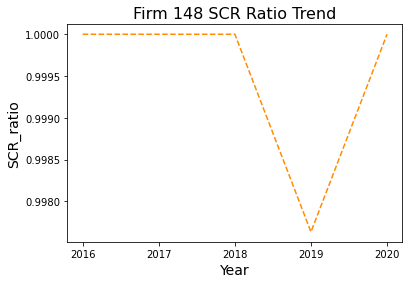

In [15]:
firm_148 =df2[df2['Firm_Name'] == 'Firm 148' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_148['SCR_ratio_2016'], firm_148['SCR_ratio_2017'], firm_148['SCR_ratio_2018'], firm_148['SCR_ratio_2019'], firm_148['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_ratio', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 148 SCR Ratio Trend', fontsize=16)
plt.show()

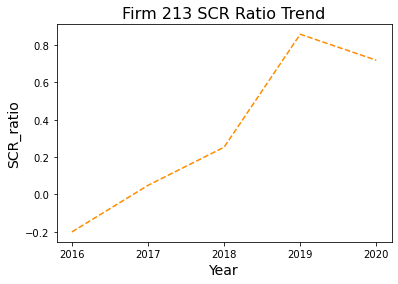

In [16]:
firm_213 =df2[df2['Firm_Name'] == 'Firm 213' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_213['SCR_ratio_2016'], firm_213['SCR_ratio_2017'], firm_213['SCR_ratio_2018'], firm_213['SCR_ratio_2019'], firm_213['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_ratio', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 213 SCR Ratio Trend', fontsize=16)
plt.show()

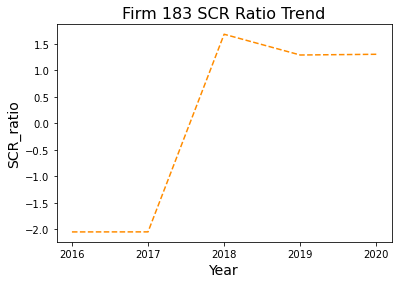

In [17]:
firm_183 =df2[df2['Firm_Name'] == 'Firm 183' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_183['SCR_ratio_2016'], firm_183['SCR_ratio_2017'], firm_183['SCR_ratio_2018'], firm_183['SCR_ratio_2019'], firm_183['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_ratio', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 183 SCR Ratio Trend', fontsize=16)
plt.show()

### Top 3 firms which require help in short time

In [18]:
# Selecting top 3 firms having NWP/GWP ratio less than 1 i.e. firms which are not insured properly/completely
# Priority order is the GWP i.e.company with more turnover should be given priority
short=df5[df5['NWP_GWP_AVG']<1]
short.sort_values(by=['GWP_AVG'], ascending=False).head(3)

,Firm_Name,GWP_AVG,NWP_GWP_AVG,SCR_ratio_AVG,EOAOL_AVG,NWP_GWP_AVG_STD,SCR_ratio_AVG_STD
3,Firm 4,33857.155951,0.725393,1.476896,19041.638489,2.537884,1.535742
104,Firm 105,14899.454840,0.730077,1.376390,20699.956203,2.537884,1.535742
310,Firm 311,13685.383398,0.393685,1.460739,11662.337006,2.537884,1.535742


##### Analysing the NWP_GWP_AVG Trend for each of the above firms 

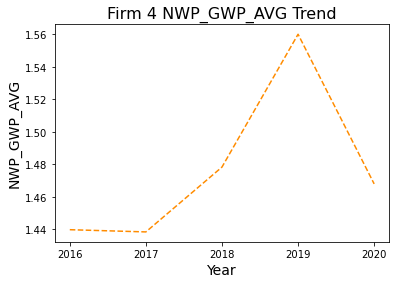

In [19]:
firm_4 =df2[df2['Firm_Name'] == 'Firm 4' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_4['SCR_ratio_2016'], firm_4['SCR_ratio_2017'], firm_4['SCR_ratio_2018'], firm_4['SCR_ratio_2019'], firm_4['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('NWP_GWP_AVG', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 4 NWP_GWP_AVG Trend', fontsize=16)
plt.show()

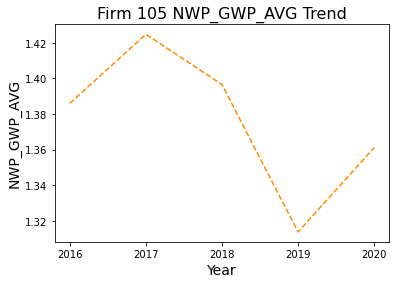

In [20]:
firm_105 =df2[df2['Firm_Name'] == 'Firm 105' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_105['SCR_ratio_2016'], firm_105['SCR_ratio_2017'], firm_105['SCR_ratio_2018'], firm_105['SCR_ratio_2019'], firm_105['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('NWP_GWP_AVG', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 105 NWP_GWP_AVG Trend', fontsize=16)
plt.show()

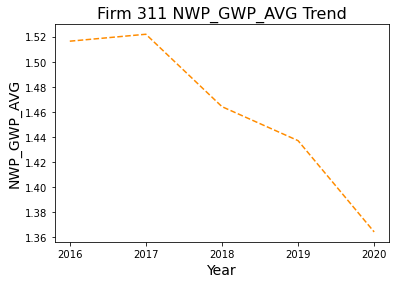

In [21]:
firm_311 =df2[df2['Firm_Name'] == 'Firm 311' ]
x = np.array(['2016', '2017', '2018', '2019', '2020'])
y = np.array([firm_311['SCR_ratio_2016'], firm_311['SCR_ratio_2017'], firm_311['SCR_ratio_2018'], firm_311['SCR_ratio_2019'], firm_311['SCR_ratio_2020']])
plt.plot(x, y,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('NWP_GWP_AVG', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Firm 311 NWP_GWP_AVG Trend', fontsize=16)
plt.show()

## Task I Analysis/ Insights:
### Top 3 firms to focus immediately:
1. Firm 148, Firm 213 and Firm 183 respectively (Refer Cell 14) needs help and should be focused immediately as otherwise these would become insolvent because their average of SCR ratio is less than 1.
2. The order for help is decided using their correspondin GWP value, i.e. the firm with high GWP value is more valuable and should be given priority.
3. In 2019, Firm 148 had more liabilities than assets, i.e. their SCR ratio dropped suddenly. However, the ratio improved significantly in 2020 but there could be a random fall again. Since this firm has GWP average of 60.580624(Highest), it becomes the most important firm.  
4. For Firm 213, there was a sharp increase in the SCR ratio for a short period between 2018 and 2019. However, the SCR ratio is decreasing since 2019. Since this firm has GWP average of 19.069063(Second highest), it becomes the second most important firm.
5. For Firm 183, there was a steep rise in the SCR ratio for a short period between 2017 and 2018. However, the ratio is decreasing since 2018. Since this firm has GWP average of 0.002746, it becomes the least important firm out of 3 but significantly important when compared to the total of 325 firms.

### Top 3 firms to focus in a short-term:
1. Firm 4, Firm 105, Firm 311 respectively (Refer Cell 18) needs help and should be focused in a short term as these firms are not completely/ properly insured because their avergae of NWP/ GWP ratio is less than 1.
2. The order for help is decided using their correspondin GWP value, i.e. the firm with high GWP value is more valuable and should be given priority.
3. The NWP/GWP average of Firm 4 is constantly declining since 2019, this implies that the firm doesn't have the complete insurance of the insurers. Since this firm has GWP average of 33857.155951(Highest), it becomes the most important firm.  
4. For Firm 105, there is a variance in their NWP/GWP average but the performance/ ratio dropped significantly low in 2019. Since this firm has GWP average of 14899.454840	(Second highest), it becomes the second most important firm.
5. For Firm 311, there is a sharp decline in the NWP/GWP average since 2017. This indicates that the insurance of the insurers is constantly decraesing year by year. Since this firm has GWP average of 13685.383398, it becomes the least important firm out of 3 but significantly important when compared to the total of 325 firms.

# Task II
#### Using relevant ML techniques to draw out further insights

## Model I: Using EOF_SCR_AVG as a target variable

#### Feature Engineering

In [22]:
#Features taken into consideration
y = (df2['EOF_SCR_AVG']).astype(float)
x1 = (df2['GWP_AVG']).astype(float)
x2 = (df2['EOAOL_AVG']).astype(float)
x3 = (df2['NWP_GWP_AVG']).astype(float)
x4 = (df2['Total_liabilities_AVG']).astype(float)

###### Correlation Analysis

In [23]:
# Calculating correlation between the features
df_corr = pd.DataFrame([x1, x2, x3, x4])
df_core = df_corr.transpose()
df_core.corr()

,GWP_AVG,EOAOL_AVG,NWP_GWP_AVG,Total_liabilities_AVG
GWP_AVG,1.000000,0.646639,0.042675,0.822653
EOAOL_AVG,0.646639,1.000000,0.030023,0.619121
NWP_GWP_AVG,0.042675,0.030023,1.000000,0.034473
Total_liabilities_AVG,0.822653,0.619121,0.034473,1.000000


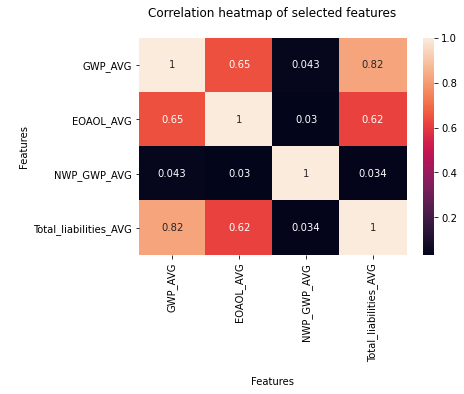

In [24]:
# Here, Dark color shows the high correlation between the features 
# and the light colors shows less correlation between the features.
fe = sns.heatmap(df_core.corr(), annot = True)
fe.set(xlabel='\nFeatures', ylabel='\nFeatures', title = "Correlation heatmap of selected features\n")
plt.savefig("Correlation_HeatMap.jpg")

In [25]:
#Eliminating Total_liabilites_AVG as it is highly correlated to GWP_AVG

###### Backward Stepwise Multiple Linear Regression

In [26]:
#### Using Backward Stepwise Multiple Linear Regression algorithm to predict the EOF_SCR_AVG

In [27]:
#creating input and output arrays
x = np.array([x1, x2, x3]).reshape((-1, 1))
y = np.array(df2['EOF_SCR_AVG'])

In [28]:
# adding the column of ones to the inputs so that the statsmodels calculate the intercept 𝑏₀. 
# as it doesn’t take 𝑏₀ into account by default.
x = sm.add_constant(x)

In [29]:
model = smf.ols(formula='y ~ x1 + x2', data=df2).fit()

In [30]:
print(model.params)
print(model.summary())

Intercept   -32.007144
x1            0.059826
x2            0.919898
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1117.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           3.35e-87
Time:                        00:25:05   Log-Likelihood:                -1150.6
No. Observations:                 144   AIC:                             2307.
Df Residuals:                     141   BIC:                             2316.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [31]:
print(f"coefficient of determination: {model.rsquared}")
print(f"adjusted coefficient of determination: {model.rsquared_adj}")
print(f"regression coefficients: {model.params}")

coefficient of determination: 0.9406513236135218
adjusted coefficient of determination: 0.9398094984165505
regression coefficients: Intercept   -32.007144
x1            0.059826
x2            0.919898
dtype: float64


In [32]:
print(f"predicted response:\n{model.fittedvalues}")

predicted response:
1          8.475312
3      19509.902090
4        104.657523
5       3907.309346
6       7741.405335
           ...     
310    11514.899169
314       77.276768
316      255.261549
321     2236.596343
323       23.829341
Length: 144, dtype: float64


In [33]:
# print(f"predicted response:\n{model.predict(x)}")

##### Partial Dependence Plots 
###### These plots show how 'y' (target/dependent) variable varies with each of the 'x' (independent) variable

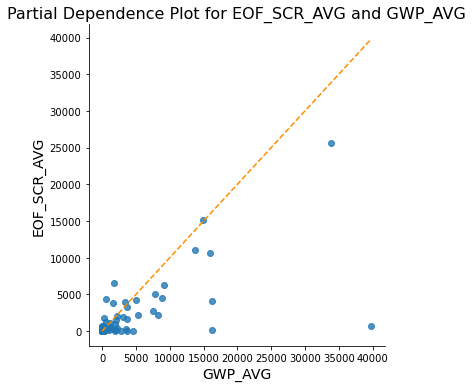

In [34]:
#Plotting the observed vs predicted values
sns.lmplot(x='GWP_AVG', y='EOF_SCR_AVG', data=df2, fit_reg=False, size=5)
    
#Plotting the diagonal line
line_coords = np.arange(df2[['GWP_AVG', 'EOF_SCR_AVG']].min().min()-10, 
                        df2[['GWP_AVG', 'EOF_SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('EOF_SCR_AVG', fontsize=14)
plt.xlabel('GWP_AVG', fontsize=14)
plt.title('Partial Dependence Plot for EOF_SCR_AVG and GWP_AVG', fontsize=16)
plt.show()

#### This plot depicts that for most of the firms EOF_SCR_AVG changes positively when their GWP_AVG change positively, i.e there is a direct relationship between the 2 variables.

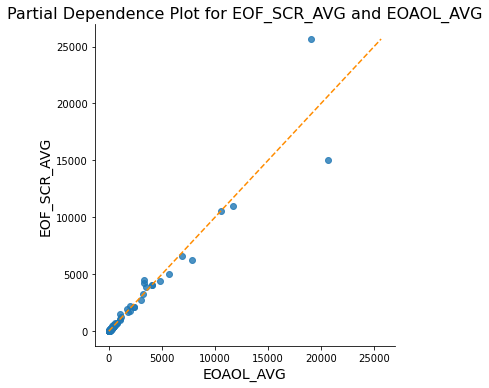

In [35]:
sns.lmplot(x='EOAOL_AVG', y='EOF_SCR_AVG', data=df2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df2[['EOAOL_AVG', 'EOF_SCR_AVG']].min().min()-10, 
                        df2[['EOAOL_AVG', 'EOF_SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('EOF_SCR_AVG', fontsize=14)
plt.xlabel('EOAOL_AVG', fontsize=14)
plt.title('Partial Dependence Plot for EOF_SCR_AVG and EOAOL_AVG', fontsize=16)
plt.show()

#### This plot depicts that most of the BIG firms use their own fund (Eligible Own Fund) to grow, i.e. EOAOL _AVG(Assest over Liablities Avg) is in a direct relationship with EOF_SCR_AVG(Eligible Own Fund Avg)

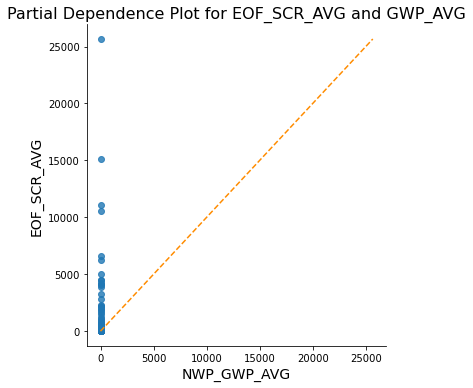

In [36]:
sns.lmplot(x='NWP_GWP_AVG', y='EOF_SCR_AVG', data=df2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df2[['NWP_GWP_AVG', 'EOF_SCR_AVG']].min().min()-10, 
                        df2[['NWP_GWP_AVG', 'EOF_SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('EOF_SCR_AVG', fontsize=14)
plt.xlabel('NWP_GWP_AVG', fontsize=14)
plt.title('Partial Dependence Plot for EOF_SCR_AVG and GWP_AVG', fontsize=16)
plt.show()

#### This plot depicts that there is no direct/ indirect relationship between NWP_GWP_AVG and EOF_SCR_AVG

## Model II: Using SCR_AVG as a target variable

#### Feature Engineering

In [37]:
#Features taken into consideration
y = (df2['SCR_AVG']).astype(float)
x1 = (df2['GWP_AVG']).astype(float)
x2 = (df2['EOAOL_AVG']).astype(float)
x3 = (df2['NWP_GWP_AVG']).astype(float)
x4 = (df2['Total_liabilities_AVG']).astype(float)

###### Correlation Analysis

In [38]:
# Calculating correlation between the features
df_corr = pd.DataFrame([x1, x2, x3, x4])
df_core = df_corr.transpose()
df_core.corr()

,GWP_AVG,EOAOL_AVG,NWP_GWP_AVG,Total_liabilities_AVG
GWP_AVG,1.000000,0.646639,0.042675,0.822653
EOAOL_AVG,0.646639,1.000000,0.030023,0.619121
NWP_GWP_AVG,0.042675,0.030023,1.000000,0.034473
Total_liabilities_AVG,0.822653,0.619121,0.034473,1.000000


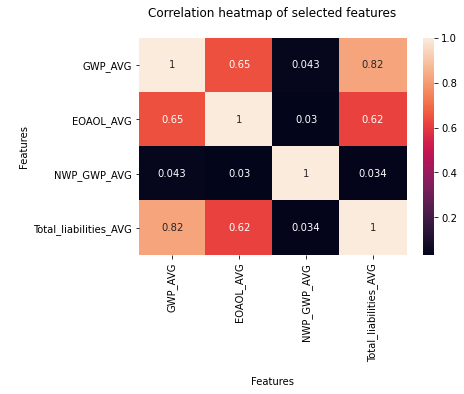

In [39]:
# Here, Dark color shows the high correlation between the features 
# and the light colors shows less correlation between the features.
fe = sns.heatmap(df_core.corr(), annot = True)
fe.set(xlabel='\nFeatures', ylabel='\nFeatures', title = "Correlation heatmap of selected features\n")
plt.savefig("Correlation_HeatMap2.jpg")

In [40]:
#Eliminating Total_liabilites_AVG as it is highly correlated to GWP_AVG

###### Backward Stepwise Multiple Linear Regression

In [41]:
#### Using Backward Stepwise Multiple Linear Regression algorithm to predict the SCR_AVG

In [42]:
#creating input and output arrays
x = np.array([x1, x2, x3]).reshape((-1, 1))
y = np.array(df2['SCR_AVG'])

In [43]:
# adding the column of ones to the inputs so that the statsmodels calculate the intercept 𝑏₀. 
# as it doesn’t take 𝑏₀ into account by default.
x = sm.add_constant(x)

In [44]:
model = smf.ols(formula='y ~ x1 + x2', data=df2).fit()

In [45]:
print(model.params)
print(model.summary())

Intercept   -50.004103
x1            0.036305
x2            0.626452
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1155.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           3.63e-88
Time:                        00:25:06   Log-Likelihood:                -1091.6
No. Observations:                 144   AIC:                             2189.
Df Residuals:                     141   BIC:                             2198.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [46]:
print(f"coefficient of determination: {model.rsquared}")
print(f"adjusted coefficient of determination: {model.rsquared_adj}")
print(f"regression coefficients: {model.params}")

coefficient of determination: 0.9424930343100407
adjusted coefficient of determination: 0.9416773326690484
regression coefficients: Intercept   -50.004103
x1            0.036305
x2            0.626452
dtype: float64


In [47]:
print(f"predicted response:\n{model.fittedvalues}")

predicted response:
1        -22.546453
3      13107.857241
4         42.804742
5       2617.711277
6       5203.164193
           ...     
310     7752.740447
314       23.573973
316      136.325501
321     1485.209407
323      -12.597351
Length: 144, dtype: float64


In [48]:
# print(f"predicted response:\n{model.predict(x)}")

##### Partial Dependence Plots 
###### These plots show how 'y' (target/dependent) variable varies with each of the 'x' (independent) variable

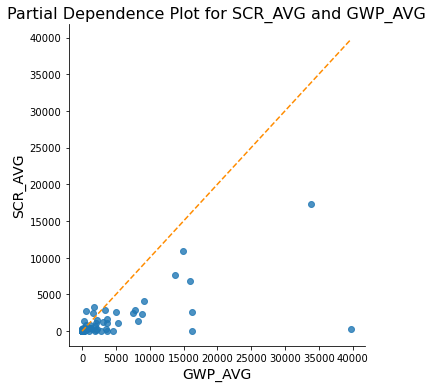

In [49]:
#Plotting the observed vs predicted values
sns.lmplot(x='GWP_AVG', y='SCR_AVG', data=df2, fit_reg=False, size=5)
    
#Plotting the diagonal line
line_coords = np.arange(df2[['GWP_AVG', 'SCR_AVG']].min().min()-10, 
                        df2[['GWP_AVG', 'SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_AVG', fontsize=14)
plt.xlabel('GWP_AVG', fontsize=14)
plt.title('Partial Dependence Plot for SCR_AVG and GWP_AVG', fontsize=16)
plt.show()

#### This plot depicts that there is a direct relationship between the 2 variables.

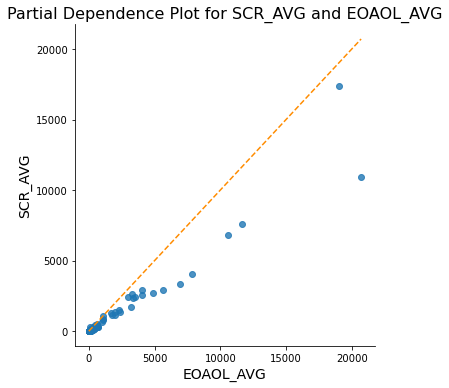

In [50]:
sns.lmplot(x='EOAOL_AVG', y='SCR_AVG', data=df2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df2[['EOAOL_AVG', 'SCR_AVG']].min().min()-10, 
                        df2[['EOAOL_AVG', 'SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_AVG', fontsize=14)
plt.xlabel('EOAOL_AVG', fontsize=14)
plt.title('Partial Dependence Plot for SCR_AVG and EOAOL_AVG', fontsize=16)
plt.show()

#### This plot depicts that as the firm's (Eligible Own Fund Assests Over Liabilites) grows, their chances of getting insolvent reduces

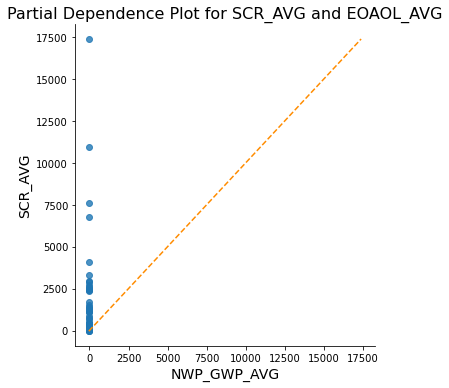

In [51]:
sns.lmplot(x='NWP_GWP_AVG', y='SCR_AVG', data=df2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df2[['NWP_GWP_AVG', 'SCR_AVG']].min().min()-10, 
                        df2[['NWP_GWP_AVG', 'SCR_AVG']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('SCR_AVG', fontsize=14)
plt.xlabel('NWP_GWP_AVG', fontsize=14)
plt.title('Partial Dependence Plot for SCR_AVG and EOAOL_AVG', fontsize=16)
plt.show()

#### This plot depicts that there is no direct/ indirect relationship between NWP_GWP_AVG and SCR_AVG

## Task II Analysis/ Insights:
#### Trend analysis of Solvency Capital Requirements (SCR) ratio
#### Formula: SCR Ratio = EOF_SCR / SCR
####  Using 2  Step-wise Backward Multiple Regression Machine Learning models analysing Eligible Own Fund Solvency Capital Requirements Average (EOF_SCR_AVG) and Solvency Capital Requirements Average (SCR_AVG) 

### Using above models we can conclude the below points:
#### 1. There is a direct relationship between GWP and EOF_SCR. This implies that as the Gross Written Premium/ turnover of the firm increases, their Eligible Own Funds (EOF) also increases .
#### 2. Similarly, there is a direct relationship between GWP and SCR. This implies that as the Gross Written Premium/ turnover of the firm increases, their Solvency Capital Requirements (SCR) also increases.
#### 3. There is a direct relationship between EOAL and EOF_SCR. This implies that as the Assests increases over Liabilities of the firm increases, their Eligible Own Funds (EOF) Solvency Capital Requirements (SCR) also increases.
#### 4. There is a direct relationship between EOAL and SCR. This implies that as the Assests increases over Liabilities of the firm increases, their Solvency Capital Requirements (SCR) also increases.
#### 5. The relationship of reinsuring the insurers (NWP/ GWP) can not be identified using SCR or EOF_SCR